# module imports

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [104]:
df = pd.read_csv('promo_order_data.csv')

In [105]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52,36,52,350.70,0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0,52
1,2021-01-01,7,248,104,250,2372.48,2,NaN,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0,248
2,2021-01-01,8,584,168,594,6651.32,4,NaN,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0,584
3,2021-01-01,9,786,196,812,9350.64,10,NaN,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0,786
4,2021-01-01,10,894,200,924,10956.32,8,NaN,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0,894


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2485 entries, 0 to 2484
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   trans_date       2485 non-null   object 
 1   trans_hour       2485 non-null   int64  
 2   customers        2485 non-null   int64  
 3   vendors          2485 non-null   int64  
 4   orders           2485 non-null   int64  
 5   amount           2485 non-null   float64
 6   promo_count      2485 non-null   int64  
 7   promo_amount     0 non-null      float64
 8   Android          2455 non-null   float64
 9   GCF              2455 non-null   float64
 10  Macintosh        2455 non-null   float64
 11  Tablet           2455 non-null   float64
 12  Windows          2455 non-null   float64
 13  X11              2455 non-null   float64
 14  iPhone           2455 non-null   float64
 15  Blacklisted      2485 non-null   int64  
 16  Not Blacklisted  2485 non-null   int64  
dtypes: float64(9),

In [107]:
df.describe()

,trans_hour,customers,vendors,orders,amount,promo_count,promo_amount,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
count,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,2485.000000,0.0,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2455.000000,2485.000000,2485.000000
mean,12.748893,1368.490946,388.434608,1391.750503,10501.810254,28.863581,NaN,76.957230,24.561303,1.492464,0.802444,3.137271,4.015479,414.123829,0.123139,1368.367807
std,4.803603,2004.241830,408.808706,2035.524228,13429.995228,52.014765,NaN,108.116562,27.477949,2.556263,1.627893,4.718685,5.286395,576.293209,0.516366,2004.155656
min,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,9.000000,28.000000,20.000000,28.000000,625.800000,0.000000,NaN,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,28.000000
50%,13.000000,474.000000,254.000000,482.000000,4485.200000,4.000000,NaN,28.000000,12.000000,0.000000,0.000000,0.000000,2.000000,146.000000,0.000000,474.000000
75%,17.000000,1892.000000,624.000000,1924.000000,14793.460000,32.000000,NaN,108.000000,40.000000,2.000000,2.000000,4.000000,6.000000,645.000000,0.000000,1892.000000
max,23.000000,9910.000000,1482.000000,10046.000000,63756.420000,442.000000,NaN,556.000000,138.000000,16.000000,12.000000,30.000000,30.000000,2918.000000,4.000000,9910.000000


In [108]:
df = df.drop(['promo_amount'], axis=1)

In [109]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,Tablet,Windows,X11,iPhone,Blacklisted,Not Blacklisted
0,2021-01-01,6,52,36,52,350.70,0,2.0,0.0,0.0,0.0,0.0,0.0,22.0,0,52
1,2021-01-01,7,248,104,250,2372.48,2,16.0,4.0,0.0,0.0,0.0,2.0,76.0,0,248
2,2021-01-01,8,584,168,594,6651.32,4,22.0,6.0,0.0,0.0,2.0,2.0,184.0,0,584
3,2021-01-01,9,786,196,812,9350.64,10,38.0,26.0,0.0,0.0,0.0,2.0,232.0,0,786
4,2021-01-01,10,894,200,924,10956.32,8,46.0,22.0,4.0,0.0,0.0,2.0,230.0,0,894


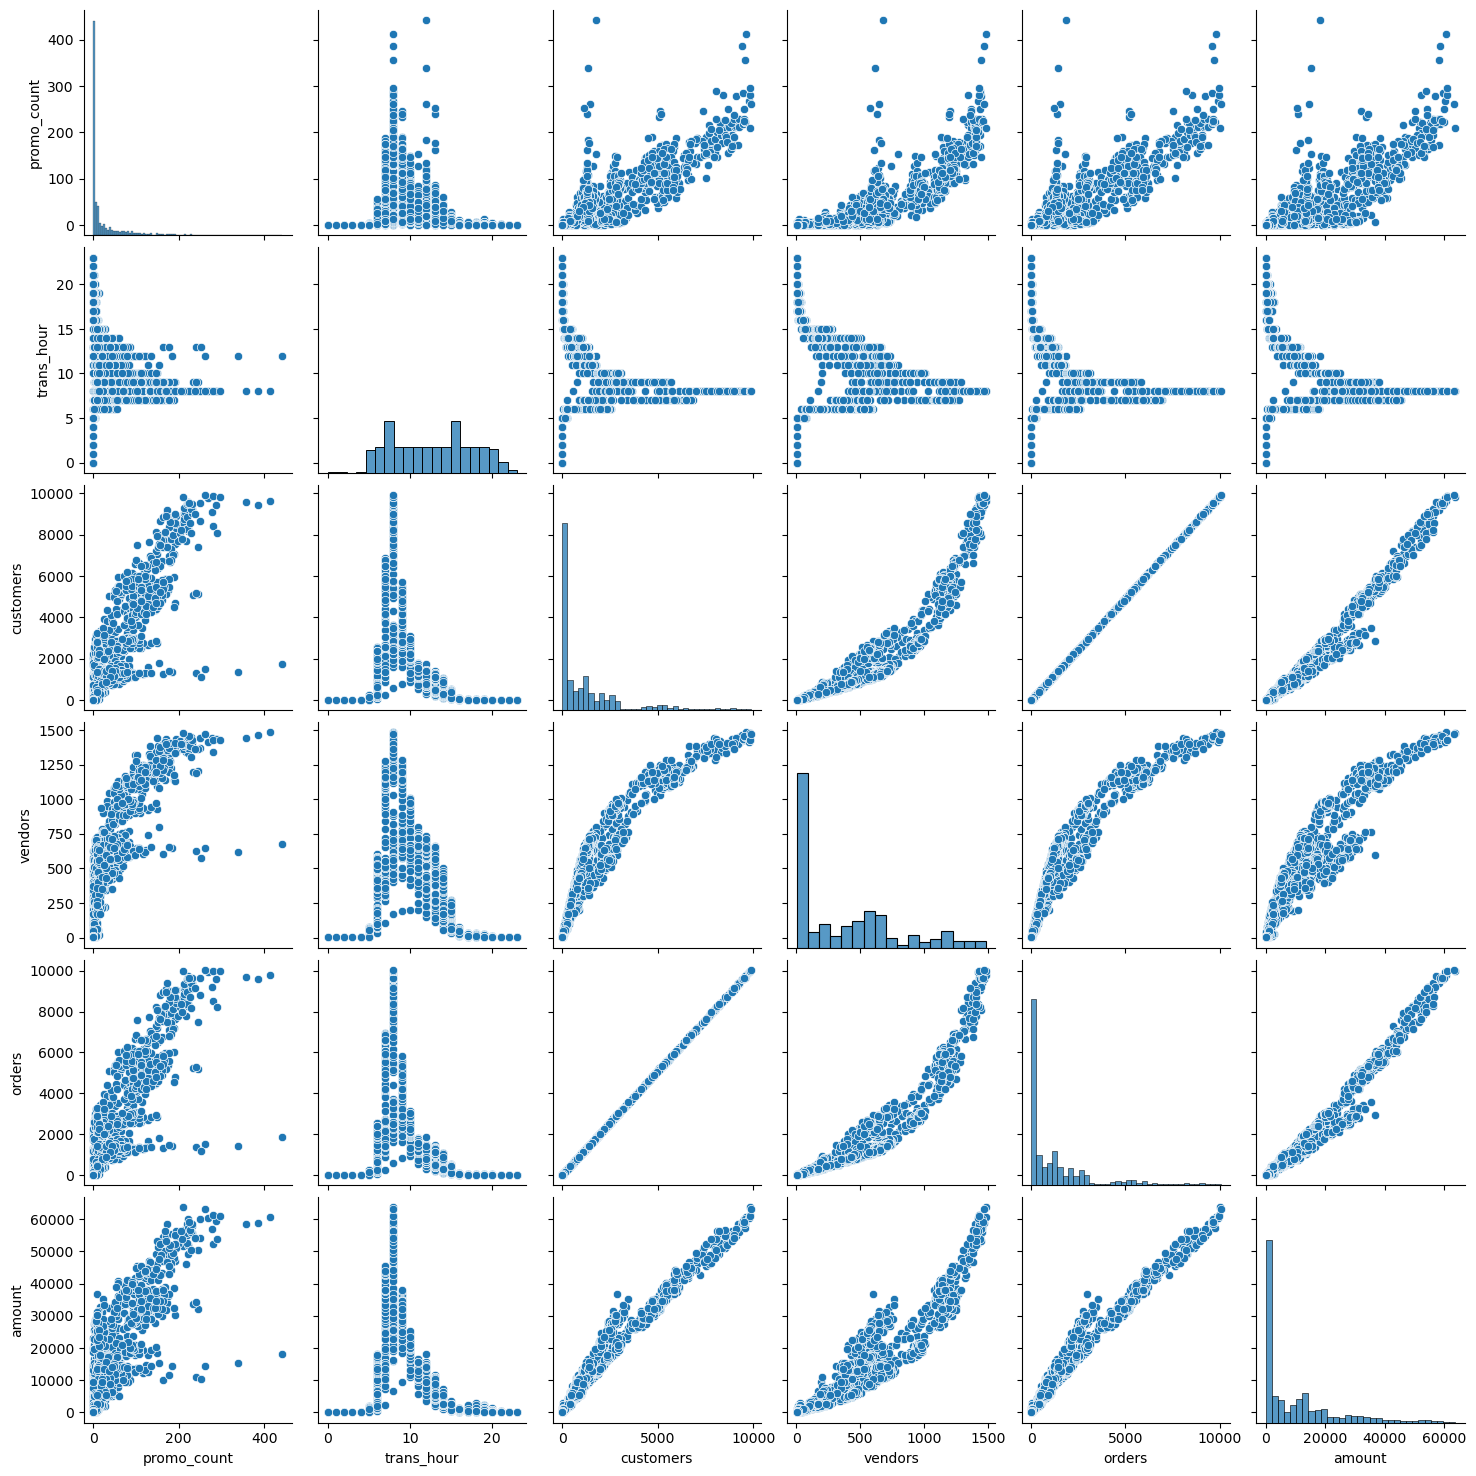

In [174]:
sns.pairplot(df[['promo_count','trans_hour','customers','vendors','orders','amount']])

In [187]:
y = df[['customers','vendors','amount','orders']]

In [188]:
X = df['promo_count'].values.reshape(-1, 1) 

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [191]:
from sklearn.linear_model import LinearRegression

In [192]:
lm = LinearRegression()

In [193]:
lm.fit(X_train,y_train)

LinearRegression()

In [194]:
predictions = lm.predict( X_test)

## Effects of Promo : Coeffecients
To answer how promos affect business in different metrics **(customers, vendors, amount, orders)**, we'll use the coefficients.

In [195]:
coeffecients = pd.DataFrame(lm.coef_,y.columns) #the shape is inverted (multiple y)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
customers,33.351424
vendors,6.588726
amount,214.003724
orders,33.885960


1. For every 1 promo, it is associated with 33.35 increase in additional customers
2. For every 1 promo, it is associated with 6.6 increase in additional vendors
3. For every 1 promo, it is associated with 214 AUD increase of sales.
4. For every 1 promo, it is associated with 34 increase in additional orders

Adding some columns

In [120]:
df['iphone_percentage'] = df['iPhone']/df['customers']

In [121]:
df['iphone_amount_perc'] = df['iphone_percentage']*df['amount']

In [161]:
df = df.rename(columns={'iphone_amount_perc': 'amount_by_iphone'})

In [123]:
df['amount_by_android'] = (df['Android']/df['customers'])*df['amount']

In [124]:
df['amount_by_GCF'] = (df['GCF']/df['customers'])*df['amount']

In [125]:
df['amount_by_mac'] = (df['Macintosh']/df['customers'])*df['amount']

In [126]:
df['amount_by_tab'] = (df['Tablet']/df['customers'])*df['amount']
df['amount_by_win'] = (df['Windows']/df['customers'])*df['amount']
df['amount_by_X11'] = (df['X11']/df['customers'])*df['amount']

Took the deviced used/total number of customer, multiply it to amount to extrapolate values.

In [127]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,...,Blacklisted,Not Blacklisted,iphone_percentage,iphone_amount_perc,amount_by_android,amount_by_GCF,amount_by_mac,amount_by_tab,amount_by_win,amount_by_X11
0,2021-01-01,6,52,36,52,350.70,0,2.0,0.0,0.0,...,0,52,0.423077,148.373077,13.488462,0.000000,0.000000,0.0,0.000000,0.000000
1,2021-01-01,7,248,104,250,2372.48,2,16.0,4.0,0.0,...,0,248,0.306452,727.050323,153.063226,38.265806,0.000000,0.0,0.000000,19.132903
2,2021-01-01,8,584,168,594,6651.32,4,22.0,6.0,0.0,...,0,584,0.315068,2095.621370,250.563425,68.335479,0.000000,0.0,22.778493,22.778493
3,2021-01-01,9,786,196,812,9350.64,10,38.0,26.0,0.0,...,0,786,0.295165,2759.985344,452.066565,309.308702,0.000000,0.0,0.000000,23.792977
4,2021-01-01,10,894,200,924,10956.32,8,46.0,22.0,4.0,...,0,894,0.257271,2818.740045,563.748009,269.618613,49.021566,0.0,0.000000,24.510783


In [128]:
from datetime import datetime

In [129]:
def day_of_week(date_1):
    date = datetime.strptime(date_1, '%Y-%m-%d')
    day_of_week = date.weekday()
    return day_of_week

In [130]:
df['day_of_week'] = df['trans_date'].apply(lambda x: day_of_week(x))

In [131]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day_of_Week'] = df['day_of_week'].map(day_mapping)

In [133]:
df = df.drop(['day_of_week'], axis=1)

In [136]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,...,Not Blacklisted,iphone_percentage,iphone_amount_perc,amount_by_android,amount_by_GCF,amount_by_mac,amount_by_tab,amount_by_win,amount_by_X11,Day_of_Week
0,2021-01-01,6,52,36,52,350.70,0,2.0,0.0,0.0,...,52,0.423077,148.373077,13.488462,0.000000,0.000000,0.0,0.000000,0.000000,Friday
1,2021-01-01,7,248,104,250,2372.48,2,16.0,4.0,0.0,...,248,0.306452,727.050323,153.063226,38.265806,0.000000,0.0,0.000000,19.132903,Friday
2,2021-01-01,8,584,168,594,6651.32,4,22.0,6.0,0.0,...,584,0.315068,2095.621370,250.563425,68.335479,0.000000,0.0,22.778493,22.778493,Friday
3,2021-01-01,9,786,196,812,9350.64,10,38.0,26.0,0.0,...,786,0.295165,2759.985344,452.066565,309.308702,0.000000,0.0,0.000000,23.792977,Friday
4,2021-01-01,10,894,200,924,10956.32,8,46.0,22.0,4.0,...,894,0.257271,2818.740045,563.748009,269.618613,49.021566,0.0,0.000000,24.510783,Friday


# For Weekend only

In [137]:
from datetime import datetime

In [138]:
def day_of_week(date_1):
    date = datetime.strptime(date_1, '%Y-%m-%d')
    day_of_week = date.weekday()
    return day_of_week

In [144]:
df['day_of_week'] = df['trans_date'].apply(lambda x: day_of_week(x))

In [145]:
day_mapping = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['Day_of_Week'] = df['day_of_week'].map(day_mapping)

In [153]:
weekend_df = df[(df['Day_of_Week']=='Saturday') | (df['Day_of_Week']=='Sunday')]

In [155]:
y2 = weekend_df[['customers','vendors','amount','orders']]
X2 = weekend_df['promo_count'].values.reshape(-1, 1) 
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=101)
lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

LinearRegression()

In [156]:
predictions = lm2.predict(X2_test)

In [157]:
coeffecients = pd.DataFrame(lm2.coef_,y.columns) #the shape is inverted (multiple y)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
customers,74.988836
vendors,20.044638
amount,768.828483
orders,76.625692


1. For every 1 promo, it is associated with 74.988 increase in additional customers
2. For every 1 promo, it is associated with 20.04 increase in additional vendors
3. For every 1 promo, it is associated with 768.8 AUD increase of sales.
4. For every 1 promo, it is associated with 76.6 increase in additional orders

# For Weekday only

In [202]:
weekday_df = df[(df['Day_of_Week']!='Saturday') & (df['Day_of_Week']!='Sunday')]

In [203]:
weekday_df['Day_of_Week'].unique()

array(['Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype=object)

In [204]:
y3 = weekday_df[['customers','vendors','amount','orders']]
X3 = weekday_df['promo_count'].values.reshape(-1, 1) 
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=101)
lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

LinearRegression()

In [205]:
predictions = lm3.predict(X3_test)

In [206]:
coeffecients = pd.DataFrame(lm3.coef_,y.columns) #the shape is inverted (multiple y)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
customers,33.120731
vendors,6.519597
amount,216.735261
orders,33.663455


1. For every 1 promo, it is associated with 33.12 increase in additional customers
2. For every 1 promo, it is associated with 6.5 increase in additional vendors
3. For every 1 promo, it is associated with 216.7 AUD increase of sales.
4. For every 1 promo, it is associated with 33.7 increase in additional orders

**Retaining promos is good especially during weekends where the number of customers and orders are noticeably lower, as long as the revenue/profit outweighs what we put out for the promos, since during promos we usually have discounts, be it for the food or the delivery.**
**Promos have higher impact during the weekends, it would be bad if we lessen/remove the promos during this time since the data shows that during this part of the week is when we are having the least amount of orders/sales.**

# EDA

In [158]:
import cufflinks as cf
cf.go_offline()

In [162]:
amt_per_device = pd.melt(df[['amount_by_iphone','amount_by_android','amount_by_GCF','amount_by_mac','amount_by_tab','amount_by_win','amount_by_X11']])

In [163]:
order_per_device = pd.melt(df[['iPhone','Android','GCF','Macintosh','Tablet','Windows','X11']])

In [164]:
amt_per_device.groupby('variable').sum().sort_values(by='value', ascending=False).iplot(kind='bar', title='Amount by Device', xTitle='Device Used', yTitle='Total Amount')


In [165]:
order_per_device.groupby('variable').sum().sort_values(by='value', ascending=False).iplot(kind='bar', title='Total Orders by Device', xTitle='Device Used', yTitle='Total Orders')

# Amount / Orders / Promo by Hour

In [166]:
df.groupby('trans_hour')['amount'].sum().iplot(kind='bar', title='Total Amount by Hour', xTitle='Hour', yTitle='Total Amount')

In [54]:
df.groupby('trans_hour')['orders'].sum().iplot(kind='bar', title='Total Orders by Hour', xTitle='Hour', yTitle='Total Orders')

In [55]:
df.groupby('trans_hour')['promo_count'].sum().iplot(kind='bar', title='Promo counts by Hour', xTitle='Hour', yTitle='Promo Count')

# Insights
**Majority of the sales/orders/promos occur during 6am - 12nn, with a noticeable dip from there up until 3pm.**
**Adding promos targeting time beyond 3pm could boost orders/sales.**

In [167]:
df['month'] = df['trans_date'].apply(lambda x: pd.to_datetime(x).month)

In [168]:
df.head()

,trans_date,trans_hour,customers,vendors,orders,amount,promo_count,Android,GCF,Macintosh,...,iphone_percentage,amount_by_iphone,amount_by_android,amount_by_GCF,amount_by_mac,amount_by_tab,amount_by_win,amount_by_X11,Day_of_Week,month
0,2021-01-01,6,52,36,52,350.70,0,2.0,0.0,0.0,...,0.423077,148.373077,13.488462,0.000000,0.000000,0.0,0.000000,0.000000,Friday,1
1,2021-01-01,7,248,104,250,2372.48,2,16.0,4.0,0.0,...,0.306452,727.050323,153.063226,38.265806,0.000000,0.0,0.000000,19.132903,Friday,1
2,2021-01-01,8,584,168,594,6651.32,4,22.0,6.0,0.0,...,0.315068,2095.621370,250.563425,68.335479,0.000000,0.0,22.778493,22.778493,Friday,1
3,2021-01-01,9,786,196,812,9350.64,10,38.0,26.0,0.0,...,0.295165,2759.985344,452.066565,309.308702,0.000000,0.0,0.000000,23.792977,Friday,1
4,2021-01-01,10,894,200,924,10956.32,8,46.0,22.0,4.0,...,0.257271,2818.740045,563.748009,269.618613,49.021566,0.0,0.000000,24.510783,Friday,1


# Daily Distribution of Amount, Orders, Promos, and Customer

In [170]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

<AxesSubplot:xlabel='Day_of_Week', ylabel='promo_count'>

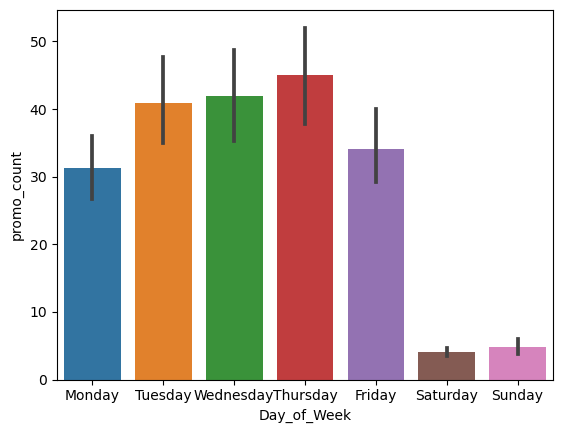

In [80]:
sns.barplot(x='Day_of_Week',y='promo_count',data=df, order=day_order)

<AxesSubplot:xlabel='Day_of_Week', ylabel='customers'>

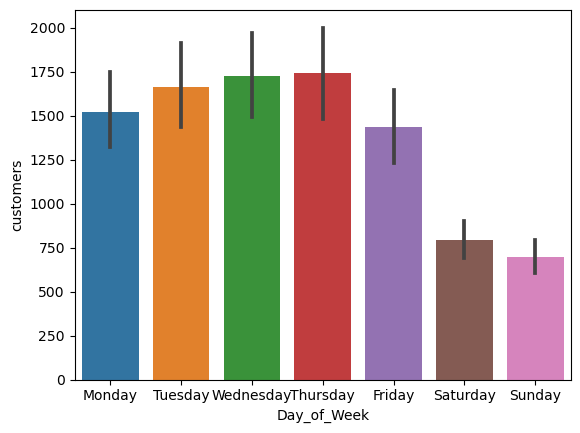

In [171]:
sns.barplot(x='Day_of_Week',y='customers',data=df, order=day_order)

<AxesSubplot:xlabel='Day_of_Week', ylabel='amount'>

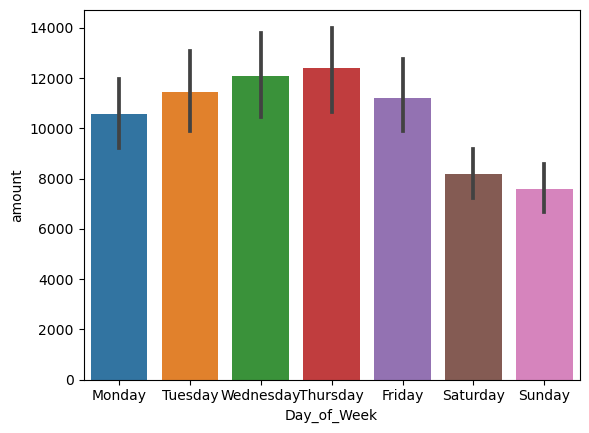

In [173]:
sns.barplot(x='Day_of_Week',y='amount',data=df, order=day_order)

<AxesSubplot:xlabel='Day_of_Week', ylabel='orders'>

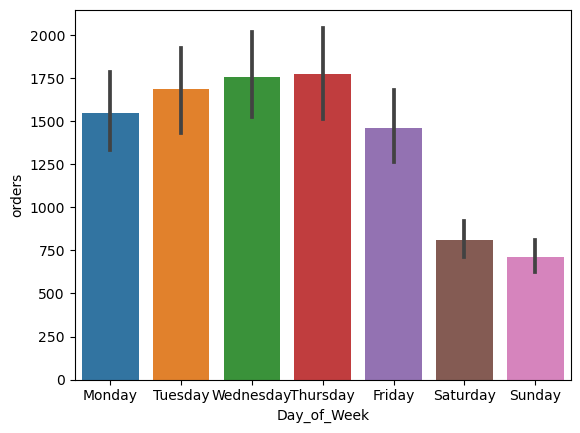

In [172]:
sns.barplot(x='Day_of_Week',y='orders',data=df, order=day_order)

**We could increase special promos during the weekends to increase orders/sales during those times.**

In [81]:
df.groupby('month')['amount'].sum().iplot(kind='bar', title='Total Amount by Month', xTitle='Month', yTitle='Total Amount')